In [1]:
#Import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statistics
import math
import random
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
#Import Dataset

df = pd.read_csv("Case Study_ Study Habits.csv", sep=",")

In [3]:
#Data Cleaning
#how many hours is StudyTime not Time
df.rename(columns = {'What is your name? (first name, last initial)':'Name', 
                     'What is your year?':'Year',
                    'How was the weather today?':'Weather', 
                     'What room did you study in?':'Room',
                    'How focused were you while studying today?':'Focus', 
                     'How long did you do school work today?':'Work',
                    'How different was your work space compared to school':'Workspace Difference',
                    'Would you say your work space at home is better or worse than your work space at school?':'Workspace Preference',
                    'What is your motivation for school work today?':'Motivation',
                     'Type of studying you did':'Type',
                    'How many hours did you spend studying today':'StudyTime',
                     'How many hours of sleep did you get last night':'Sleep',
                    'How many hours of screen time did you have today?':'Screentime',
                    'How many hours of physical activity did you do today?':'Physical Activity',}, inplace = True)

df['Name'].replace({'Option 1':'Melanie T'}, inplace=True)
df['Name'].replace({'Aayush Patel':'Aayush P'}, inplace=True)
df['Name'].replace(dict.fromkeys(['Adrien'], 'Adrien A'), inplace=True)
df['Name'].replace(dict.fromkeys(['MT'], 'Melanie T'), inplace=True)
df['Name'].replace(dict.fromkeys(['Devin Cannistraro '], 'Devin C'), inplace=True)
df['Name'].replace(dict.fromkeys(['Robert L.'], 'Robert L'), inplace=True)
df['Name'].replace(dict.fromkeys(['Dflo'], 'Dylan D'), inplace=True)
df['Name'].replace(dict.fromkeys(['Kameron, J'], 'Kameron J'), inplace=True)


df['Name'].replace(dict.fromkeys(['Robert L'], 'Student 1'), inplace=True)
df['Name'].replace(dict.fromkeys(['Melanie T'], 'Student 2'), inplace=True)
df['Name'].replace(dict.fromkeys(['Kyle C'], 'Student 3'), inplace=True)
df['Name'].replace(dict.fromkeys(['Kameron J'], 'Student 4'), inplace=True)
df['Name'].replace(dict.fromkeys(['Josiah A'], 'Student 5'), inplace=True)
df['Name'].replace(dict.fromkeys(['John D'], 'Student 6'), inplace=True)
df['Name'].replace(dict.fromkeys(['Jacqueline Broderick'], 'Student 7'), inplace=True)
df['Name'].replace(dict.fromkeys(['Dylan D'], 'Student 8'), inplace=True)
df['Name'].replace(dict.fromkeys(['Devin C'], 'Student 9'), inplace=True)
df['Name'].replace(dict.fromkeys(['Bryan A'], 'Student 10'), inplace=True)
df['Name'].replace(dict.fromkeys(['Brody H.'], 'Student 11'), inplace=True)
df['Name'].replace(dict.fromkeys(['Brian R'], 'Student 12'), inplace=True)
df['Name'].replace(dict.fromkeys(['Ben A'], 'Student 13'), inplace=True)
df['Name'].replace(dict.fromkeys(['Adrien A'], 'Student 14'), inplace=True)
df['Name'].replace(dict.fromkeys(['Aayush P'], 'Student 15'), inplace=True)

df['Weather'].replace(dict.fromkeys(['Sunny & Cloudy'], 'Partly Cloudy'), inplace=True)
df['Weather'].replace(dict.fromkeys(['Windy and rainy '], 'Rainy'), inplace=True)
df['Motivation'].replace(dict.fromkeys(['lower than average motivation'], int(2)), inplace=True)
df.Motivation = df.Motivation.astype(int)

df['Timestamp'].replace(dict.fromkeys(['4/8/2020', '4/15/2020'], 'Wednesday'), inplace=True)
df['Timestamp'].replace(dict.fromkeys(['4/9/2020', '4/16/2020'], 'Thursday'), inplace=True)
df['Timestamp'].replace(dict.fromkeys(['4/10/2020', '4/17/2020'], 'Friday'), inplace=True)
df['Timestamp'].replace(dict.fromkeys(['4/11/2020', '4/18/2020'], 'Saturday'), inplace=True)
df['Timestamp'].replace(dict.fromkeys(['4/12/2020'], 'Sunday'), inplace=True)
df['Timestamp'].replace(dict.fromkeys(['4/13/2020'], 'Monday'), inplace=True)
df['Timestamp'].replace(dict.fromkeys(['4/14/2020'], 'Tuesday'), inplace=True)


df.head()

,Timestamp,Name,Year,Weather,Room,Focus,Work,Workspace Difference,Workspace Preference,Motivation,Type,StudyTime,Sleep,Screentime,Physical Activity,Are there any extra comments or concerns you have about online courses?
0,Wednesday,Student 2,NaN,Rainy,dining room,3,More than when I'm at school,very different,Better,2,Homework,4,4,8,2,NaN
1,Wednesday,Student 10,Junior,Partly Cloudy,bedroom,3,The same amount that I would do at school,very different,Better,3,Practice Questions;Watching Live or Prerecorde...,3,9,>= 10,<= 1,NaN
2,Thursday,Student 4,Junior,Overcast,bedroom,3,less than when I'm at school,somewhat different,Better,4,Homework,2,7,>= 10,<= 1,NaN
3,Thursday,Student 6,freshman,Rainy,office,3,less than when I'm at school,very different,Better,1,Homework,2,9,10,2,NaN
4,Thursday,Student 7,sophomore,Rainy,bedroom,4,The same amount that I would do at school,somewhat different,Better,3,Read Slides;Group Work;Homework;Watching Live ...,3,9,<= 4,2,NaN


In [4]:
df.Name.value_counts()

Student 1     10
Student 5      5
Student 10     4
Student 14     3
Student 11     3
Student 9      3
Student 8      3
Student 2      2
Student 12     2
Student 4      2
Student 15     2
Student 13     1
Student 7      1
Student 6      1
Student 3      1
Name: Name, dtype: int64

In [5]:
#20 People took the survey, but only half took it more than once
df.Name.nunique()

15

no graph
no graph
no graph
no graph
no graph
no graph
no graph
no graph
no graph
no graph
no graph
no graph
no graph


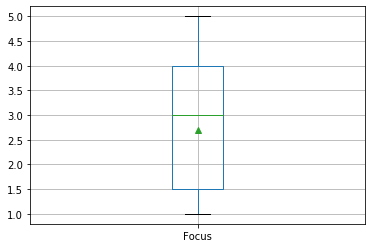

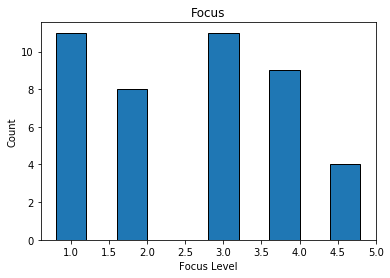

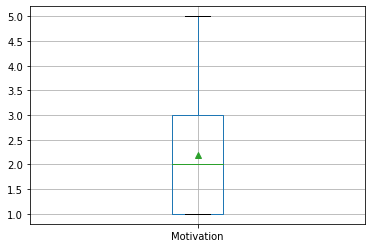

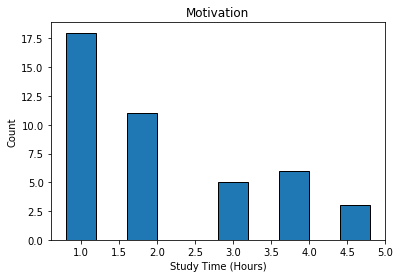

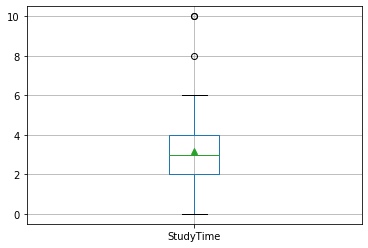

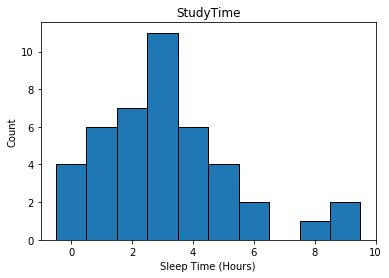

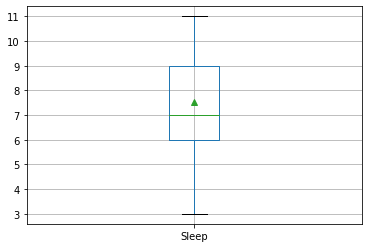

In [6]:
#box and histogram plots for all possible questions
#attempt to make the chart at first, if you can't, then close the figure 
name = ['Focus Level', 'Study Time (Hours)', 'Sleep Time (Hours)']
i = 0
for column in df:
    try:
        
        plt.figure()
        df.boxplot([column], showmeans = True)
        df.hist([column], align = 'left', edgecolor = 'black', grid=False)
        plt.ylabel('Count')
        plt.xlabel(name[i])
        i = i + 1
    except Exception:
        plt.close()
        print('no graph')


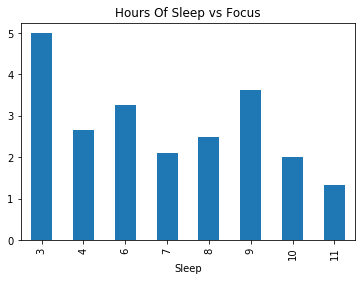

In [7]:
#bargraph (y) Focus v (x) sleep hours
roomgb = df.groupby('Sleep')['Focus'].mean()
roomgb.plot.bar(x = 'Name', y = 'Focus', title = "Hours Of Sleep vs Focus")
#print(df.groupby('Room'))


[None, None, None, None, None, None]

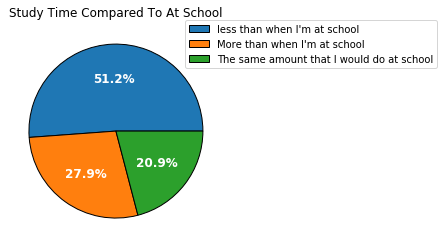

In [8]:
#Pie chart for "How long did you do school work today?"
fig1, ax1 = plt.subplots()
labels = df['Work'].value_counts().index.tolist()

wedges, texts, autotexts = ax1.pie(df['Work'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax1.set_title('Study Time Compared To At School')

ax1.legend(loc="center right", bbox_to_anchor=(1, .5, 1, .8), labels= labels)
plt.setp(autotexts, size=12, weight="bold")


Text(0.5, 1.0, 'Focus vs. Sleep Hours and Study Hours averages')

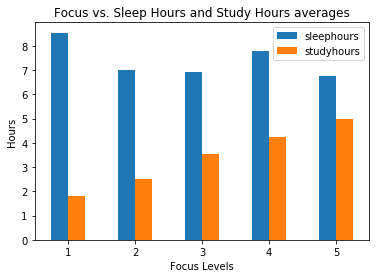

In [9]:
focus = df.groupby('Focus').agg(sleephours=pd.NamedAgg(column='Sleep', aggfunc=np.mean),
                                studyhours=pd.NamedAgg(column='StudyTime', aggfunc=np.mean))

focus.plot.bar(rot=0)
plt.ylabel('Hours')
plt.xlabel('Focus Levels')
plt.title('Focus vs. Sleep Hours and Study Hours averages')

Text(0.5, 1.0, 'Individuals vs. Sleep Hours and Study Hours')

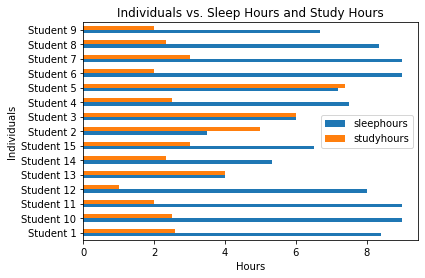

In [10]:
focus = df.groupby('Name').agg(sleephours=pd.NamedAgg(column='Sleep', aggfunc=np.mean),
                               studyhours=pd.NamedAgg(column='StudyTime', aggfunc=np.mean))

focus.plot.barh(rot=0)
plt.xlabel('Hours')
plt.ylabel('Individuals')
plt.title('Individuals vs. Sleep Hours and Study Hours')

Text(0.5, 1.0, 'Weather vs. Study Hours averages')

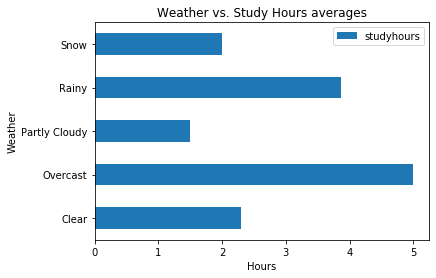

In [11]:
focus = df.groupby('Weather').agg(studyhours=pd.NamedAgg(column='StudyTime', aggfunc=np.mean))
                                
focus.plot.barh(rot=0)
plt.ylabel('Weather')
plt.xlabel('Hours')
plt.title('Weather vs. Study Hours averages')

Text(0.5, 1.0, 'Individuals vs. Study Hours, Focus Level and Motivation Level averages')

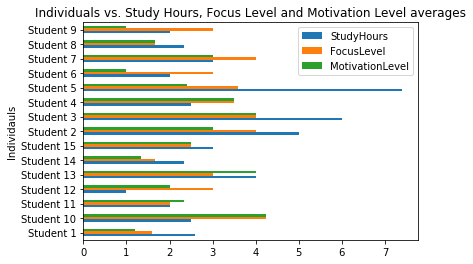

In [12]:
focus = df.groupby('Name').agg(StudyHours=pd.NamedAgg(column='StudyTime', aggfunc=np.mean),
                               FocusLevel=pd.NamedAgg(column='Focus', aggfunc=np.mean),
                               MotivationLevel=pd.NamedAgg(column='Motivation', aggfunc=np.mean))
                 
      
focus.plot.barh(rot=0)
plt.ylabel('Individauls')
plt.xlabel('')
plt.title('Individuals vs. Study Hours, Focus Level and Motivation Level averages')

Text(0.5, 1.0, 'Day vs. Study Hours, Focus Level and Motivation Level averages')

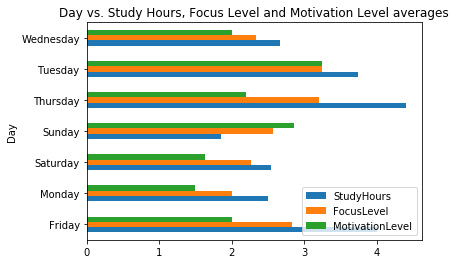

In [13]:
focus = df.groupby('Timestamp').agg(StudyHours=pd.NamedAgg(column='StudyTime', aggfunc=np.mean),
                               FocusLevel=pd.NamedAgg(column='Focus', aggfunc=np.mean),
                               MotivationLevel=pd.NamedAgg(column='Motivation', aggfunc=np.mean))
                 
      
focus.plot.barh(rot=0)
plt.ylabel('Day')
plt.xlabel('')
plt.title('Day vs. Study Hours, Focus Level and Motivation Level averages')

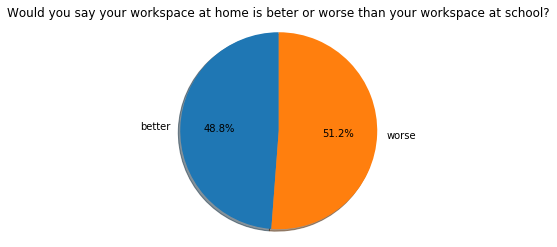

In [14]:
#Pie chart
labels = 'better', 'worse'
sizes = [48.8, 51.2]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax1.set_title('Would you say your workspace at home is beter or worse than your workspace at school?')

plt.show()

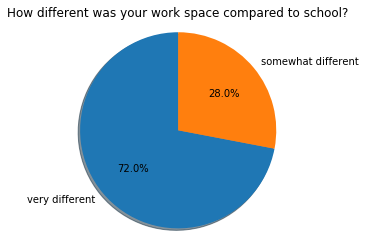

In [15]:
#Pie chart
labels = 'very different', 'somewhat different'
sizes = [72, 28]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax1.set_title('How different was your work space compared to school?')

plt.show()

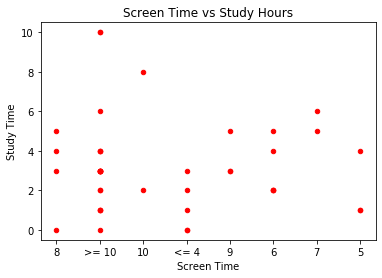

In [16]:
#Scatter plot 
plt.title('Screen Time vs Study Hours')
plt.xlabel('Screen Time')
plt.ylabel('Study Time')

plt.scatter(df.Screentime, df.StudyTime, s=20, c='red')

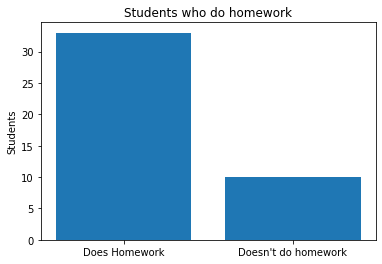

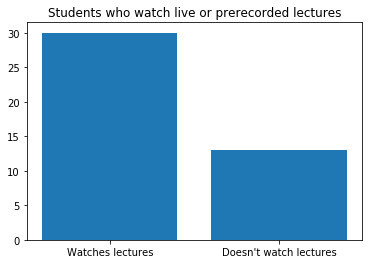

In [17]:
#Data analysis Type of studying done

hw = df.Type.str.contains(pat = 'Homework')
lectures = df.Type.str.contains(pat = 'Watching Live or Prerecorded Lectures')

x = np.arange(2)

plt.bar(x, hw.value_counts(), align='center')
plt.xticks(x, ("Does Homework", "Doesn't do homework"))
plt.ylabel('Students')
plt.title('Students who do homework')
#plt.savefig('hw.png')
plt.show()

plt.bar(x, lectures.value_counts(), align='center')
plt.xticks(x, ("Watches lectures", "Doesn't watch lectures"))
plt.title('Students who watch live or prerecorded lectures')
#plt.savefig('lectures.png')
plt.show()